# Fourier transform

In [3]:
from Fourier_transform import *
%matplotlib inline
N = 2**14
T = 1/1024.0
f_bem = 1024.0

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Sine function

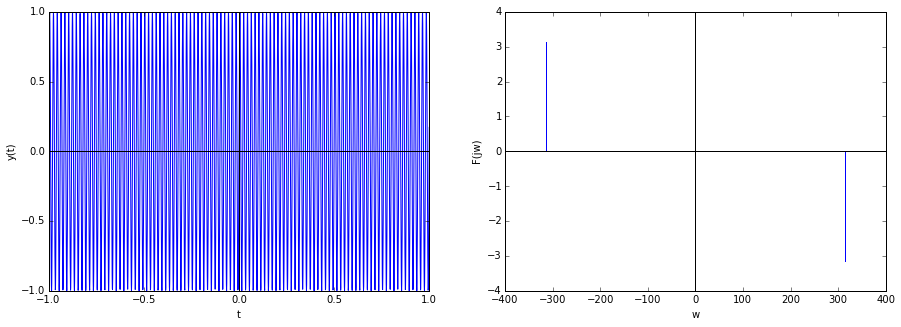

<function __main__.sine>

In [2]:
def sine(f):
    t = np.linspace(-N*T/2,N*T/2,N)
    y = np.sin(2*np.pi *f*t)
    w_0 = 2*pi*f
    draw(t,y,[-w_0,-w_0,w_0,w_0],[pi,0,0,-pi],(-1,1))
   
interact(sine,f=(1,100))

## Cosine function

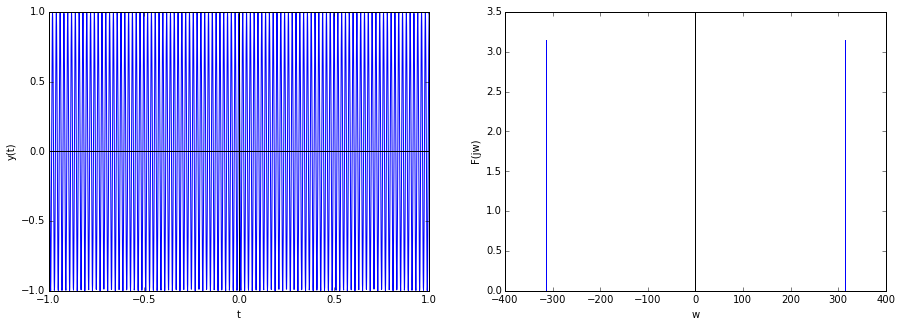

<function __main__.cosine>

In [3]:
def cosine(f):
    t = np.linspace(-N*T/2,N*T/2,N)
    y = np.cos(2*np.pi *f*t)
    w_0 = 2*pi*f
    draw(t,y,[-w_0,-w_0,w_0,w_0],[pi,0,0,pi],(-1,1))

interact(cosine,f=(1,100))

## Impulse

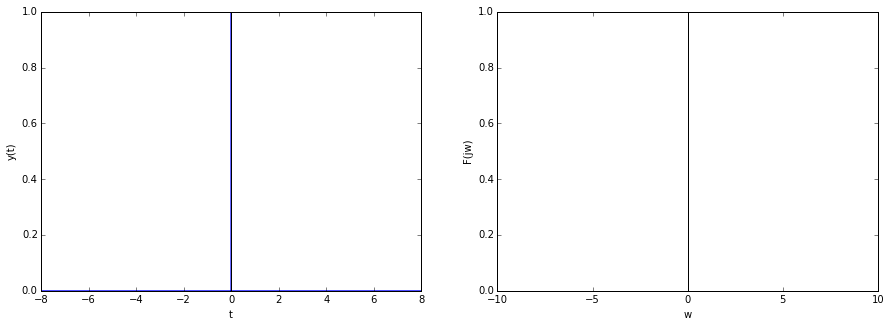

In [4]:
def impulse():
    t = np.linspace(-N*T/2,N*T/2,N)
    y = np.zeros(len(t)) 
    y[len(t)/2] = 1
    draw(t,y,[-10,10],[1,1])
impulse()

## Impulse train

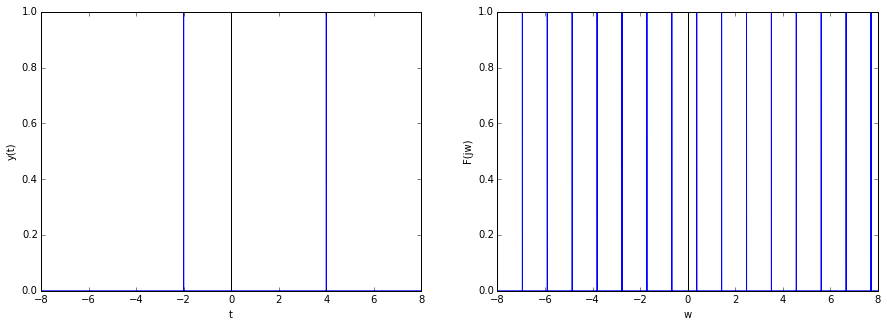

In [5]:
def impulse_train(period):
    t = np.linspace(-N*T/2,N*T/2,2**14)
    y = np.zeros(len(t))
    i = 0
    while i < len(t):
        y[i] = 1
        i += period*f_bem
    w_0 = 2*pi/period
    w = np.linspace(-N*T/2,N*T/2,N)
    y_w = np.zeros(len(w))
    k = 0
    while k < len(w):
        y_w[k] = 1
        k += w_0*f_bem
    draw(t,y,w,y_w)

interact(impulse_train,period = (1,10))
    
    
    
    

## Block

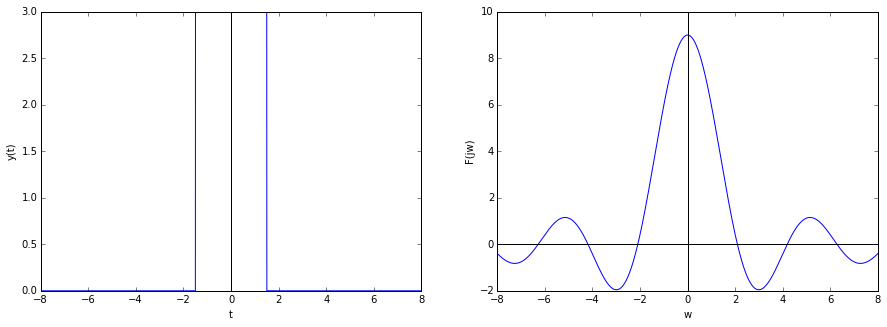

In [4]:
y_w = None
w = None
def block(amp,width):
    global y_w,w
    t = np.linspace(-N*T/2,N*T/2,N)
    y = np.zeros(len(t))
    i = int(len(t)/2-(width/2.0)*f_bem)
    while i <= int(len(t)/2 + (width/2.0)*f_bem):
        y[i] = amp
        i += 1
    w = np.linspace(-N*T/2,N*T/2,N)
    y_w = 2*amp*np.sin(w*width/2)/w
    draw(t,y,w,y_w)
    
interact(block,amp=(1,5),width = (1,8))

### Low pass filter

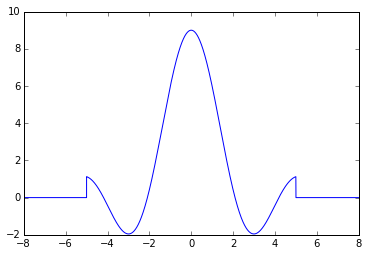

In [5]:
def low_pass(cut_off_frequency):
    pos_pos = np.amin(np.where(w > cut_off_frequency))
    pos_neg = np.amax(np.where(w < -cut_off_frequency))
    temp = y_w[pos_neg:pos_pos]
    diff = len(w) - len(temp)
    y_w_lp = [0] * (diff/2) + temp.tolist() + [0]*(diff/2)
    if diff%2 == 1:
        y_w_lp += [0]
    plt.plot(w,y_w_lp)
    plt.show()
interact(low_pass,cut_off_frequency=(1,7))